### Universidad Católica "Nuestra Señora de la Asunción"
### Facultad de Ciencias y Tecnología
---

#Telecomunicaciones 1

#Laboratorio PAM

#Alumno: Esteban Gamarra

#Matrícula:Y05084
---




**1) Generación de Señales PAM:**

> Bloque con sangría



$s(t)=A_m p(t)$  para   $m = \pm 1, \pm 3, ....., \pm M-1 $

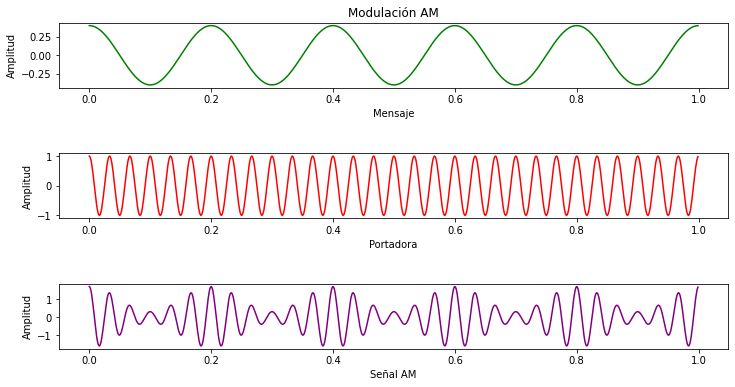

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Carrier wave c(t)=A_c*cos(2*pi*f_c*t)
#Modulating wave m(t)=A_m*cos(2*pi*f_m*t)
#Modulated wave s(t)=A_c[1+mu*cos(2*pi*f_m*t)]cos(2*pi*f_c*t)

#A_c = float(input('Enter carrier amplitude: '))
A_c = 1
#f_c = float(input('Enter carrier frquency: '))
f_c=30
#A_m = float(input('Enter message amplitude: '))
A_m=0.4
#f_m = float(input('Enter message frquency: '))
f_m=5
#modulation_index = float(input('Enter modulation index: '))
modulation_index=0.7

Ts=0.001
t = np.arange(0, 1, Ts)

c = A_c*np.cos(2*np.pi*f_c*t)
m = A_m*np.cos(2*np.pi*f_m*t)
s = A_c*(1+modulation_index*np.cos(2*np.pi*f_m*t))*np.cos(2*np.pi*f_c*t)

plt.figure(figsize = (12, 6))
plt.subplot(3,1,1)
plt.title('Modulación AM')
plt.plot(t,m,'g')
plt.ylabel('Amplitud')
plt.xlabel('Mensaje')

plt.subplot(3,1,2)
plt.plot(t,c, 'r')
plt.ylabel('Amplitud')
plt.xlabel('Portadora')

plt.subplot(3,1,3)
plt.plot(t,s, color="purple")
plt.ylabel('Amplitud')
plt.xlabel('Señal AM')

plt.subplots_adjust(hspace=1)
plt.rc('font', size=16)
fig = plt.gcf()

fig.savefig('Amplitude Modulation.png', dpi=100)

**2) Espectro de Señales AM DSB_FC:**


$S(f) = \frac{A_c}{2}[\delta (f-fc) + \delta (f-fc)]
+ \frac{k_a A_c}{2}[\delta (f-fc) + \delta (f-fc)]$


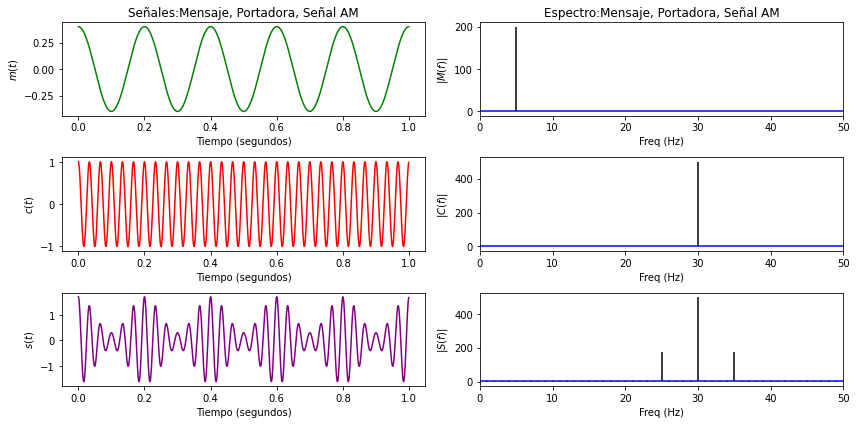

In [ ]:
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)

from numpy.fft import fft, ifft

M = fft(m)  # Realizamos la FFT del mensaje
C = fft(c)  # Realizamos la FFT del mensaje
S = fft(s)  # Realizamos la FFT del mensaje

N = len(M)  # Guardamos la longitud del vector de salida (misma que de entrada)

n = np.arange(N)  # Vector de puntos de la FFT
Epoca = N*Ts      # Tiempo de la ventana en tiempo de la muestrs
freq = n/Epoca    # Obtenemos el vector de frecuencias

plt.figure(figsize = (12, 6))

plt.subplot(321)
plt.title('Señales:Mensaje, Portadora, Señal AM')
plt.plot(t, ifft(M), 'green')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('$m(t)$')

plt.subplot(322)
plt.title('Espectro:Mensaje, Portadora, Señal AM')
plt.stem(freq, np.abs(M), linefmt='black', markerfmt=" ", bottom=1.1, basefmt="-b", use_line_collection=True)
#plt.stem(freq, np.abs(M), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('$|M(f)|$')
plt.xlim(0, 50)

plt.subplot(323)
plt.plot(t, ifft(C), 'red')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('$c(t)$')

plt.subplot(324)
plt.stem(freq, np.abs(C), linefmt='black', markerfmt=" ", bottom=1.1, basefmt="-b", use_line_collection=True)
#plt.stem(freq, np.abs(M), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('$|C(f)|$')
plt.xlim(0, 50)

plt.subplot(325)
plt.plot(t, ifft(S), 'purple')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('$s(t)$')

plt.subplot(326)
plt.stem(freq, np.abs(S), linefmt='black', markerfmt=" ", bottom=1.1, basefmt="-b", use_line_collection=True)
#plt.stem(freq, np.abs(M), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('$|S(f)|$')
plt.xlim(0, 50)

plt.tight_layout()
plt.show()

**3) Demodulación**

Método Detector de Envolvente (Rectificación + Lowpass Filter)


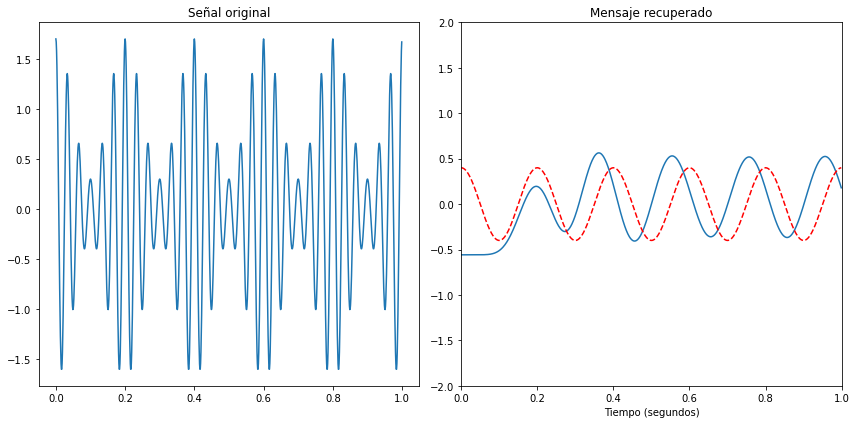

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba', fs=None)[source]
sos = signal.butter(10, 7, 'lowpass', analog=False, fs=1/Ts, output='sos')
message=signal.sosfilt(sos, abs(s))

plt.figure(figsize = (12, 3))
plt.subplot(121)
plt.title('Señal original')
plt.plot(t, s)
plt.subplot(122)
plt.plot(t, message-np.mean(message))
plt.plot(t, m, 'r--')
plt.title('Mensaje recuperado')
plt.axis([0, 1, -2, 2])
plt.xlabel('Tiempo (segundos)')
plt.tight_layout()
plt.show()

                                                                                                                                                                              Método Detector de Envolvente (envolvente compleja)

Método Detector de Envolvente (Magnitud de la señal analítica)

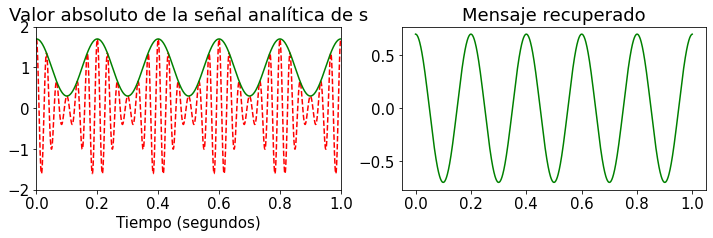

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

analytic_signal = hilbert(s)  # Obtiene la señal analítica 
m = np.abs(analytic_signal)

plt.figure(figsize = (12, 3))
plt.subplot(121)
plt.plot(t, s,'r--')
plt.plot(t, m, 'g')
plt.title('Valor absoluto de la señal analítica de s')
plt.axis([0, 1, -2, 2])
plt.xlabel('Tiempo (segundos)')
plt.subplot(122)
plt.title('Mensaje recuperado')
plt.plot(t, m-np.mean(m), 'g')
#plt.rc('font', size=1)
plt.show()
